In [7]:
library(keras)

In [54]:
X <- matrix(scale(iris[,1:4]), nrow=150, ncol=4)
Y <- to_categorical(iris[,5])
Y <- Y[,2:4]


In [66]:
rm(model)
model <- keras_model_sequential() 

In [67]:
model %>% 
    layer_dense(units = 8, activation = 'relu', input_shape = c(4)) %>% 
    layer_dense(units = 3, activation = 'softmax')

In [68]:
summary(model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_23 (Dense)                    (None, 8)                       40          
________________________________________________________________________________
dense_24 (Dense)                    (None, 3)                       27          
Total params: 67
Trainable params: 67
Non-trainable params: 0
________________________________________________________________________________


In [69]:
model %>% compile(
     loss = 'categorical_crossentropy',
     optimizer = 'adam',
     metrics = 'accuracy'
 )

In [71]:
history <- model %>% fit(
     X, Y, 
     epochs = 200, 
     batch_size = 5, 
     validation_split = 0.2
 )



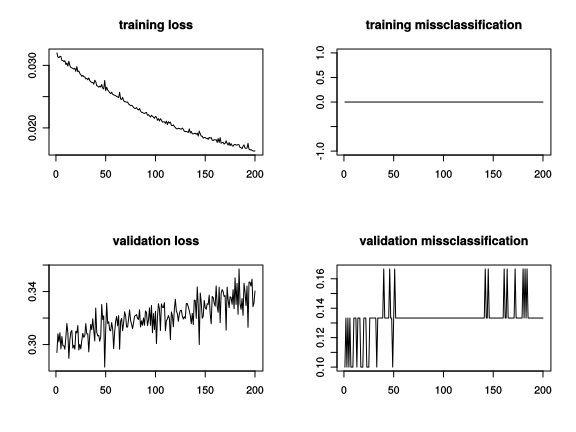

In [99]:
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow=c(2,2))
plot(history$metrics$loss, type="l", xlab="", ylab="", main="training loss")
plot(1-history$metrics$acc, type="l", xlab="", ylab="", main="training missclassification")
plot(history$metrics$val_loss, type="l", xlab="", ylab="", main="validation loss")
plot(1-history$metrics$val_acc, type="l", xlab="", ylab="", main="validation missclassification")

In [100]:
str(history)

List of 2
 $ params :List of 8
  ..$ steps             : NULL
  ..$ metrics           : chr [1:4] "loss" "acc" "val_loss" "val_acc"
  ..$ samples           : int 120
  ..$ verbose           : int 1
  ..$ do_validation     : logi TRUE
  ..$ batch_size        : int 5
  ..$ epochs            : int 200
  ..$ validation_samples: int 30
 $ metrics:List of 4
  ..$ val_acc : num [1:200] 0.9 0.867 0.9 0.867 0.9 ...
  ..$ val_loss: num [1:200] 0.294 0.308 0.302 0.309 0.297 ...
  ..$ acc     : num [1:200] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ loss    : num [1:200] 0.032 0.0313 0.0312 0.0314 0.0314 ...
 - attr(*, "class")= chr "keras_training_history"
